# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression


# Load data

In [2]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [3]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


# PCA + SVM

In [4]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import svm, metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

**Task 1: 
Use X_train, y_train to train a SVM (SKlean's SVC) with the deafult parameters. 
Make sure you normailize the data by using StandardScaler
Evaulate the algorithm using accuracy score and X_test, y_test.**

In [5]:
# SVM using sklearn's SVC with default parameters.
model = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC())
])

model.fit(X_train, y_train)
print(f"    Training accuracy: {metrics.accuracy_score(y_train, model.predict(X_train)):.2%}")
print(f"    Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test)):.2%}")

    Training accuracy: 100.00%
    Test accuracy: 98.61%


**Task 2: Now do the same, but use PCA.
In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.
Print the accuracy of SVM + PCA.**

In [6]:
# Using PCA with whiten=True to ensure the input to SVC is zero mean and unit variance (like StandardScaler).
model = Pipeline([
    ('pca', PCA(whiten=True)),
    ('svc', SVC())
])

model.fit(X_train, y_train)
print(f"    Training accuracy: {metrics.accuracy_score(y_train, model.predict(X_train)):.2%}")
print(f"    Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test)):.2%}")

    Training accuracy: 100.00%
    Test accuracy: 87.50%


**Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.**
- Since we are keeping all of the PCA components, we have not lost any data, just applied a linear tranform to our test data before running SVM.

**Q2: Did the results improve\stayed the same\got worse?**
- The training score stayed the same, but since the feature space is different after applying PCA, a different hyperplane was found. For this particular (unseen) test set, the hyperplane found using PCA was worse and thus the test accuracy decreased. Note that simply choosing a different random train/test split will yield different results (the test score may increase, stay the same, or decrease).

# PCA + Logistic Regression

**Task 3: repeat task 1 with logistic regression.**

In [7]:
# Logistic Regression with default parameters.
model = Pipeline([
    ('scaler', StandardScaler()), 
    ('logit', LogisticRegression())
])

model.fit(X_train, y_train)
print(f"    Training accuracy: {metrics.accuracy_score(y_train, model.predict(X_train)):.2%}")
print(f"    Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test)):.2%}")

    Training accuracy: 100.00%
    Test accuracy: 98.61%


**Task 4: repeast task 2 with logistic regression.**

In [8]:
# Using PCA with whiten=True to ensure the input to logit is zero mean and unit variance (like StandardScaler).
model = Pipeline([
    ('pca', PCA(whiten=True)),
    ('logit', LogisticRegression())
])

model.fit(X_train, y_train)
print(f"    Training accuracy: {metrics.accuracy_score(y_train, model.predict(X_train)):.2%}")
print(f"    Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test)):.2%}")

    Training accuracy: 100.00%
    Test accuracy: 93.06%


**Q3: Did the results improved\stayed the same\got worse?**

- Similar to the SVM, the training score did not change but the test score got worse using PCA.

**Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of SVM from it. Hint: SVM assumes the data can be seperated by an hyperplan.**

- There is no difference between Q3 and Q4 for this particular train/test split. In general, I would expect little change in using PCA with SVM, as I would expect the SVM to find the optimal hyperplane in either case and a linear transformation is unlikely to make a big difference. However, for Logistic Regression the linear transformation applied by PCA may make it easier to discriminate and thus result in improved classification accuracy. 

# Visualizing

**Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.**

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

In [10]:
def plot_2d(X, y):
    classes = np.unique(y)
    for c in classes:
        class_ind = (y==c)
        plt.scatter(X[class_ind, 0], X[class_ind, 1])
    # Don't show axis ticks or tick labels.
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)

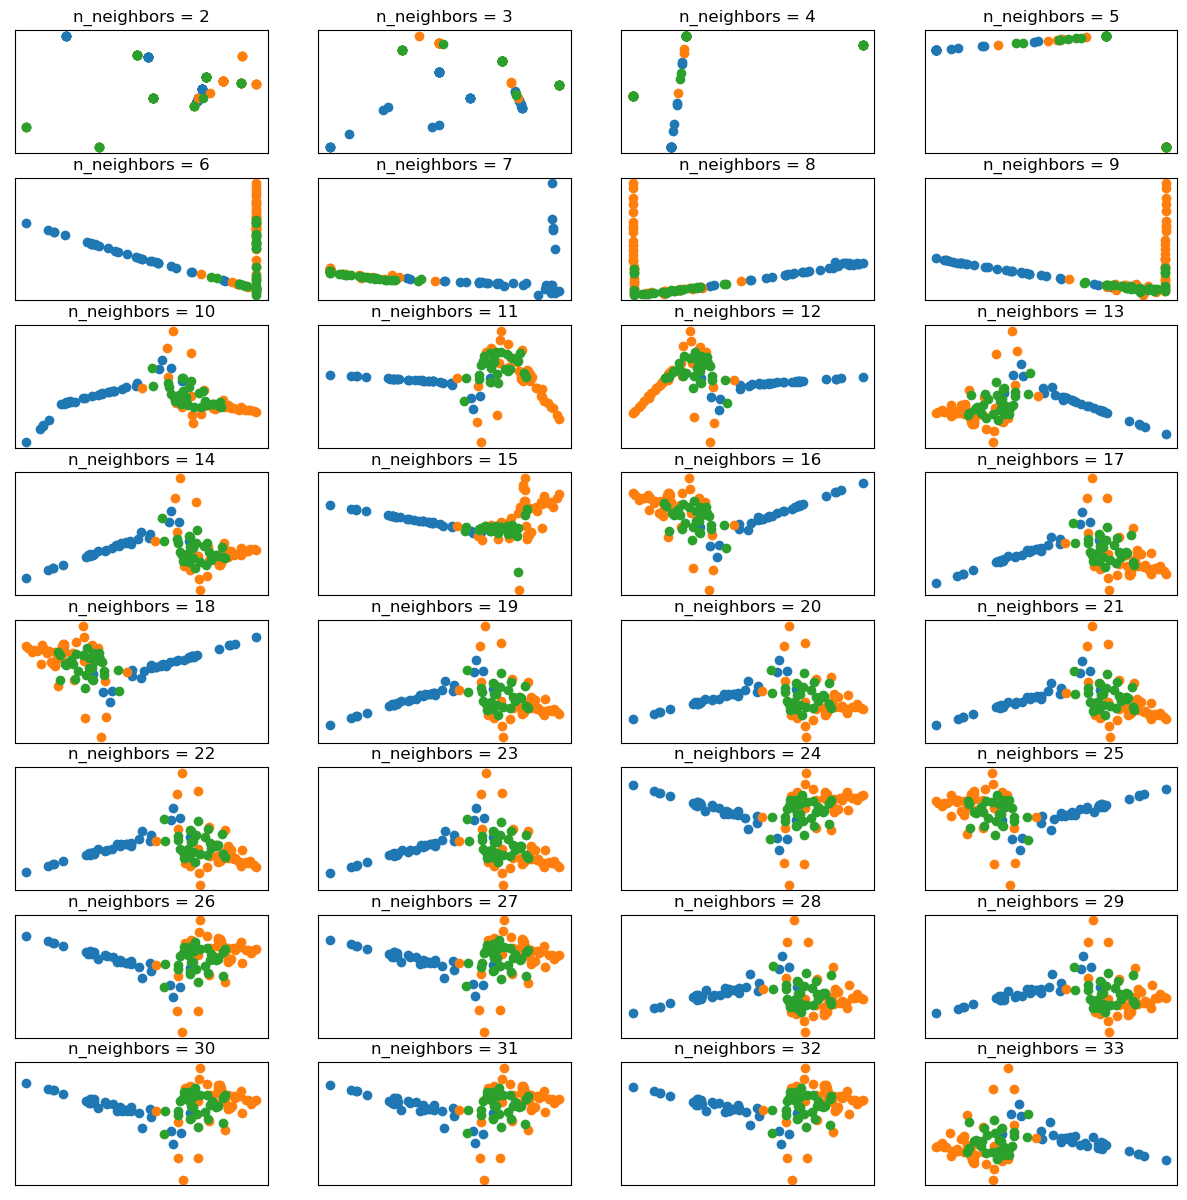

In [11]:
# Try several different values for n_neighbors.
plt.figure(figsize=(15, 15))
for i, n_neighbors in enumerate(range(2, 34)):
    plt.subplot(8, 4, i+1)
    plot_2d(LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors).fit_transform(X_train), y_train)
    plt.title(f"n_neighbors = {n_neighbors}")

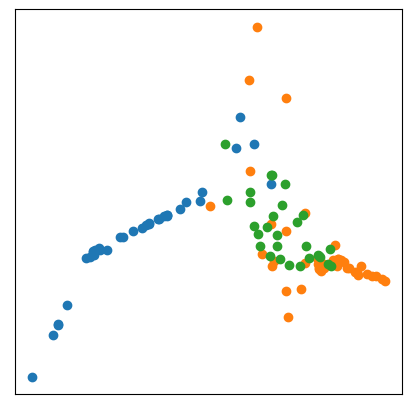

In [12]:
# Use n_neighbors = 10.
plt.figure(figsize=(5, 5))
plot_2d(LocallyLinearEmbedding(n_components=2, n_neighbors=10).fit_transform(X_train), y_train)

**Task 6: Use t-SNE to visualize the data. Plot the results.**

In [13]:
from sklearn.manifold import TSNE

c:\Users\kherz\anaconda3\envs\ydata\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\Users\kherz\anaconda3\envs\ydata\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\Users\kherz\anaconda3\envs\ydata\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\Users\kherz\anaconda3\envs\ydata\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure bette

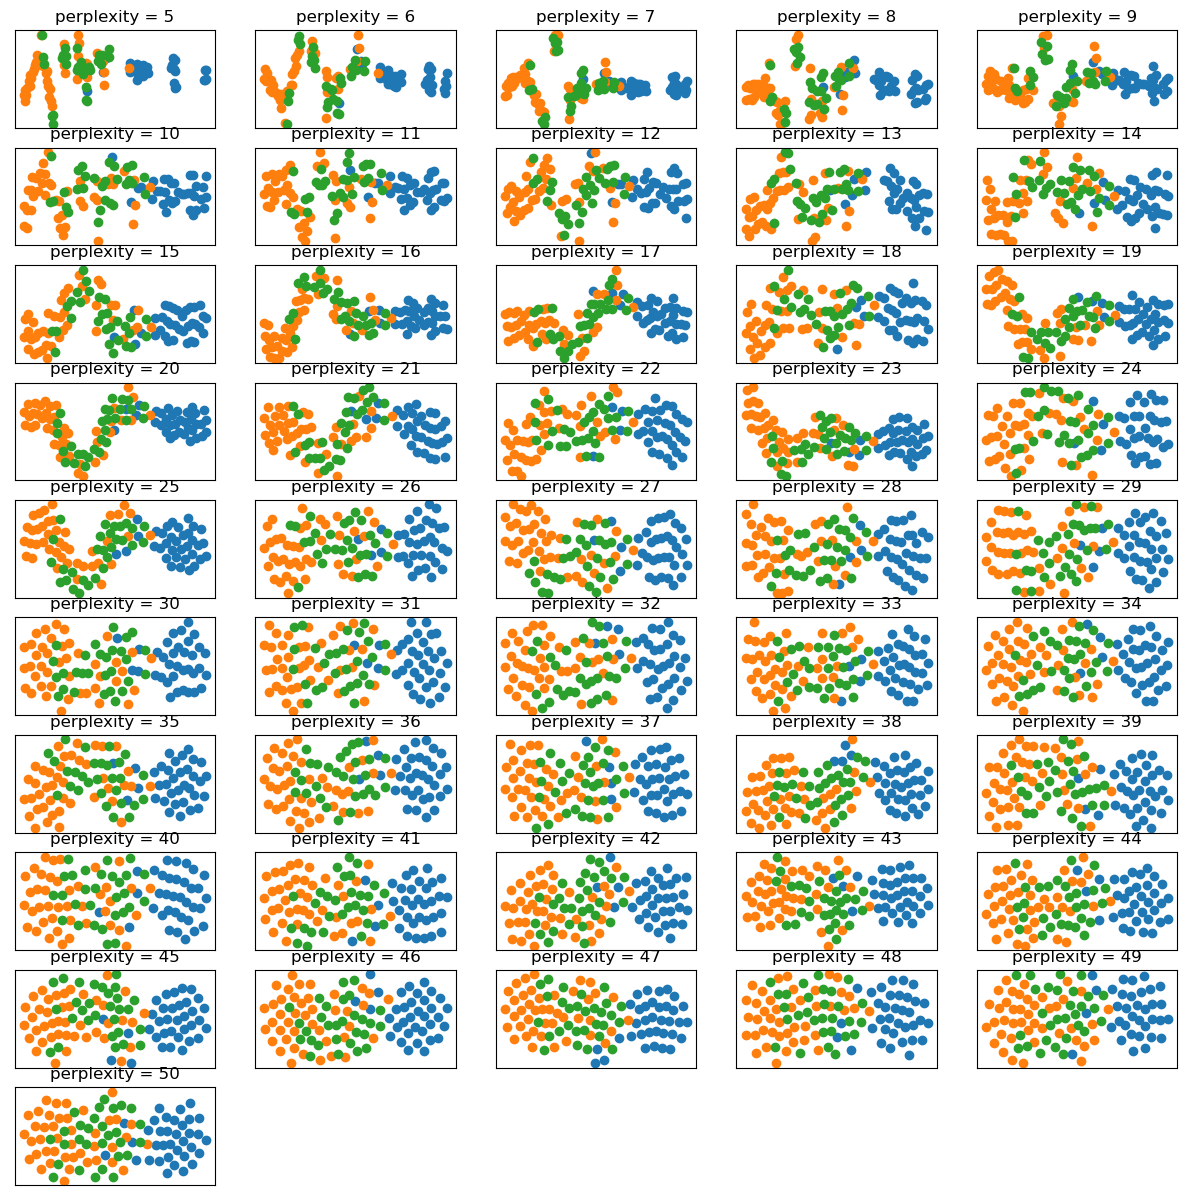

In [14]:
# Try several different values for perplexity.
plt.figure(figsize=(15, 15))
for i, perplexity in enumerate(range(5, 51)):
    plt.subplot(10, 5, i+1)
    plot_2d(TSNE(n_components=2, perplexity=perplexity, learning_rate="auto", init="pca").fit_transform(X_train), y_train)
    plt.title(f"perplexity = {perplexity}")

c:\Users\kherz\anaconda3\envs\ydata\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


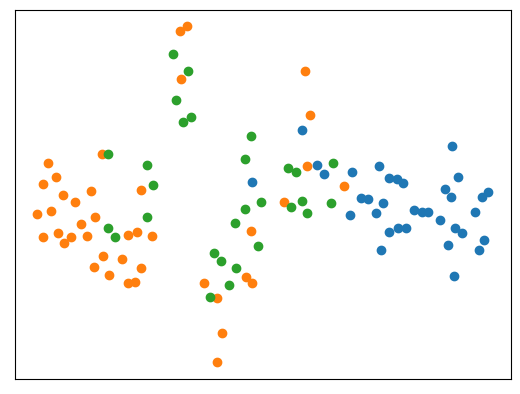

In [15]:
# Choose perplexity = 9.
plot_2d(TSNE(n_components=2, perplexity=9, learning_rate="auto", init="pca").fit_transform(X_train), y_train)

**Task 7: Use UMAP to visualize the data. Plot the results.**

In [16]:
# pip install umap-learn
from umap import UMAP

c:\Users\kherz\anaconda3\envs\ydata\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\kherz\anaconda3\envs\ydata\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


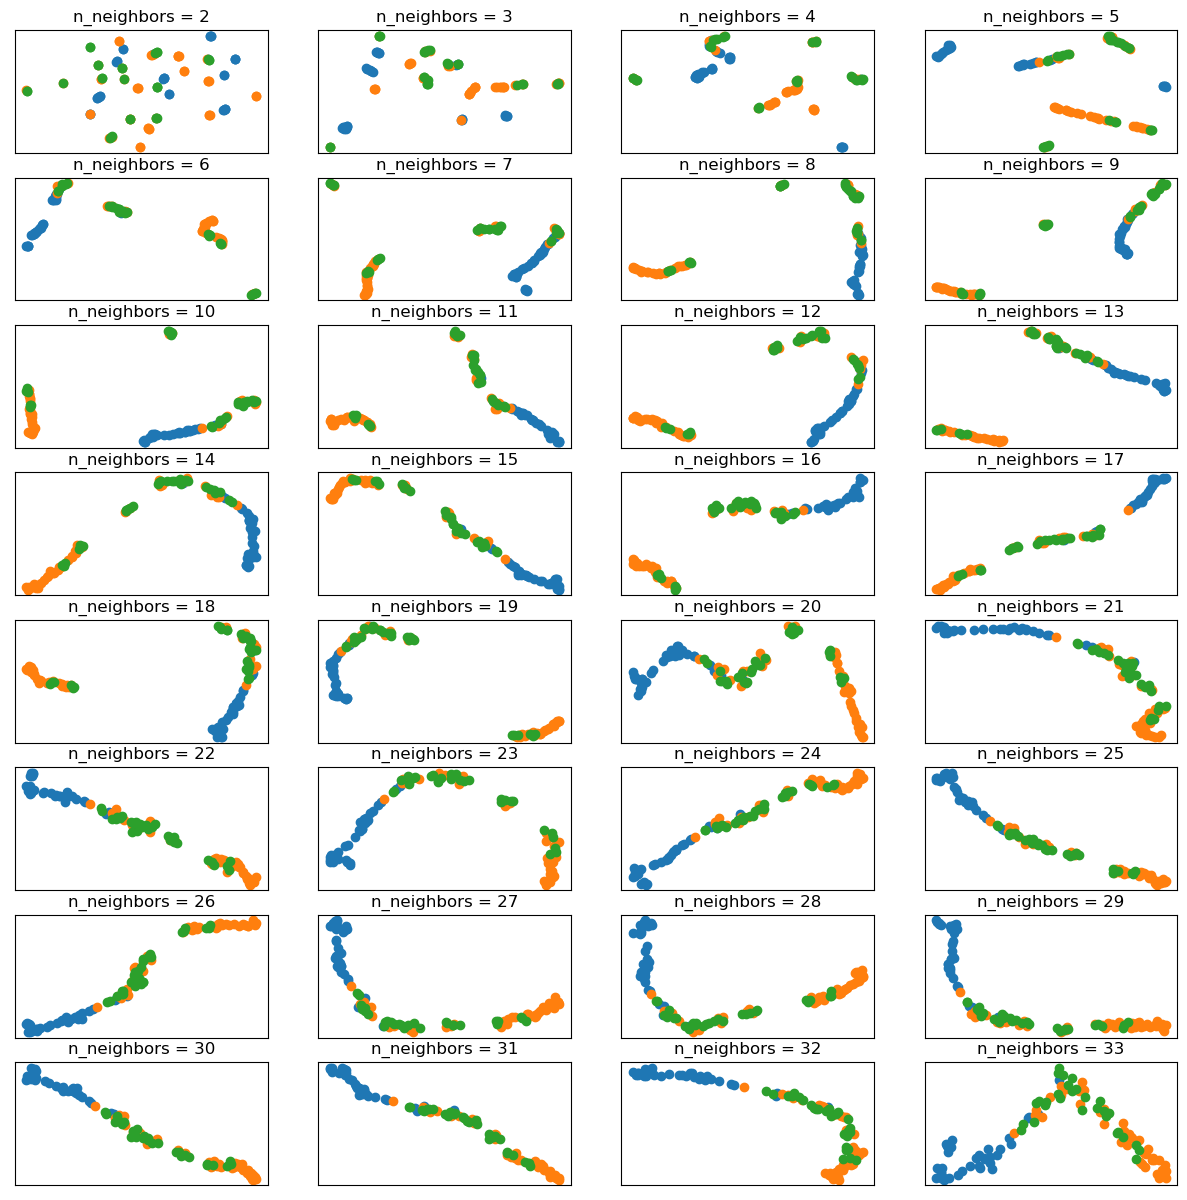

In [17]:
# Try several different values for n_neighbors.
plt.figure(figsize=(15, 15))
for i, n_neighbors in enumerate(range(2, 34)):
    plt.subplot(8, 4, i+1)
    plot_2d(UMAP(n_components=2, n_neighbors=n_neighbors).fit_transform(X_train), y_train)
    plt.title(f"n_neighbors = {n_neighbors}")

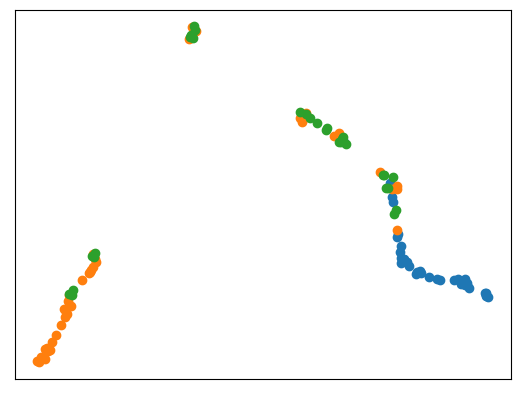

In [18]:
# Choose n_neighbors = 10.
plot_2d(UMAP(n_components=2, n_neighbors=10).fit_transform(X_train), y_train)

**Q5: If we run one of this visualizing algorithms various times with the default parameters, are we guaranteed to see the same results? Why?**
- No, because many of them are non-deterministic, both in their initialization and in how they iterate.